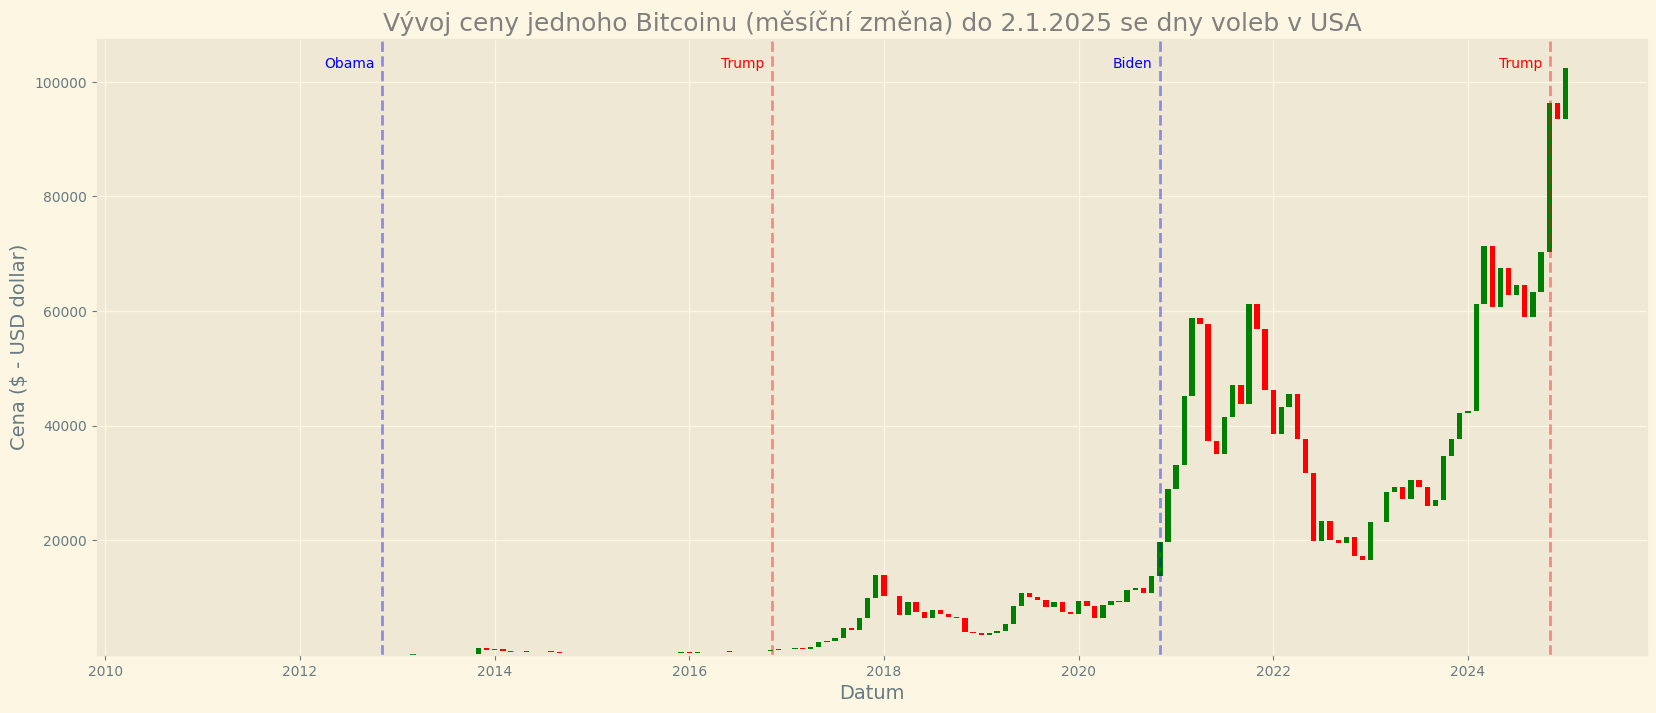

In [13]:
from matplotlib import pyplot as plt
import pandas as pd

plt.style.use("Solarize_Light2")

df_bitcoin = pd.read_csv("Bitcoin Historical Data.csv", sep=",", decimal=".", thousands=",")

volby = [["2012-11-06","Obama", "blue"], ["2016-11-08", "Trump", "red"], ["2020-11-03", "Biden", "blue"], ["2024-11-05", "Trump", "red"]]

df_bitcoin["Date"] = pd.to_datetime(df_bitcoin["Date"])

df_bitcoin = df_bitcoin.sort_values("Date") # proc serazeny ze soucasnosti do minulost :(
df_bitcoin["Zmena"] = df_bitcoin["Price"].diff()
df_bitcoin.at[0, "Zmena"] = df_bitcoin["Price"].iloc[0]
df_bitcoin["Spodek"] = df_bitcoin["Price"] - df_bitcoin["Zmena"]

barvy = []
for i in (df_bitcoin["Zmena"]):
    if i < 0:
        barvy.append("red")
    else:
        barvy.append("green")

plt.figure(figsize=(20, 8))
bars = plt.bar(df_bitcoin["Date"], df_bitcoin["Zmena"], bottom=df_bitcoin["Spodek"], color=barvy, width=20)

for i in range(len(volby)):
    datum = pd.to_datetime(volby[i][0])
    jmeno = volby[i][1]
    barva = volby[i][2]
    plt.axvline(datum, color=barva, linestyle="--", alpha=0.4)
    plt.text(datum - pd.Timedelta(days=30), df_bitcoin["Price"].max(), jmeno, color=barva, ha="right")

plt.title("Vývoj ceny jednoho Bitcoinu (měsíční změna) do 2.1.2025 se dny voleb v USA", fontsize=18, color="grey")
plt.xlabel("Datum", fontsize=14)
plt.ylabel("Cena ($ - USD dollar)", fontsize=14)

plt.show()

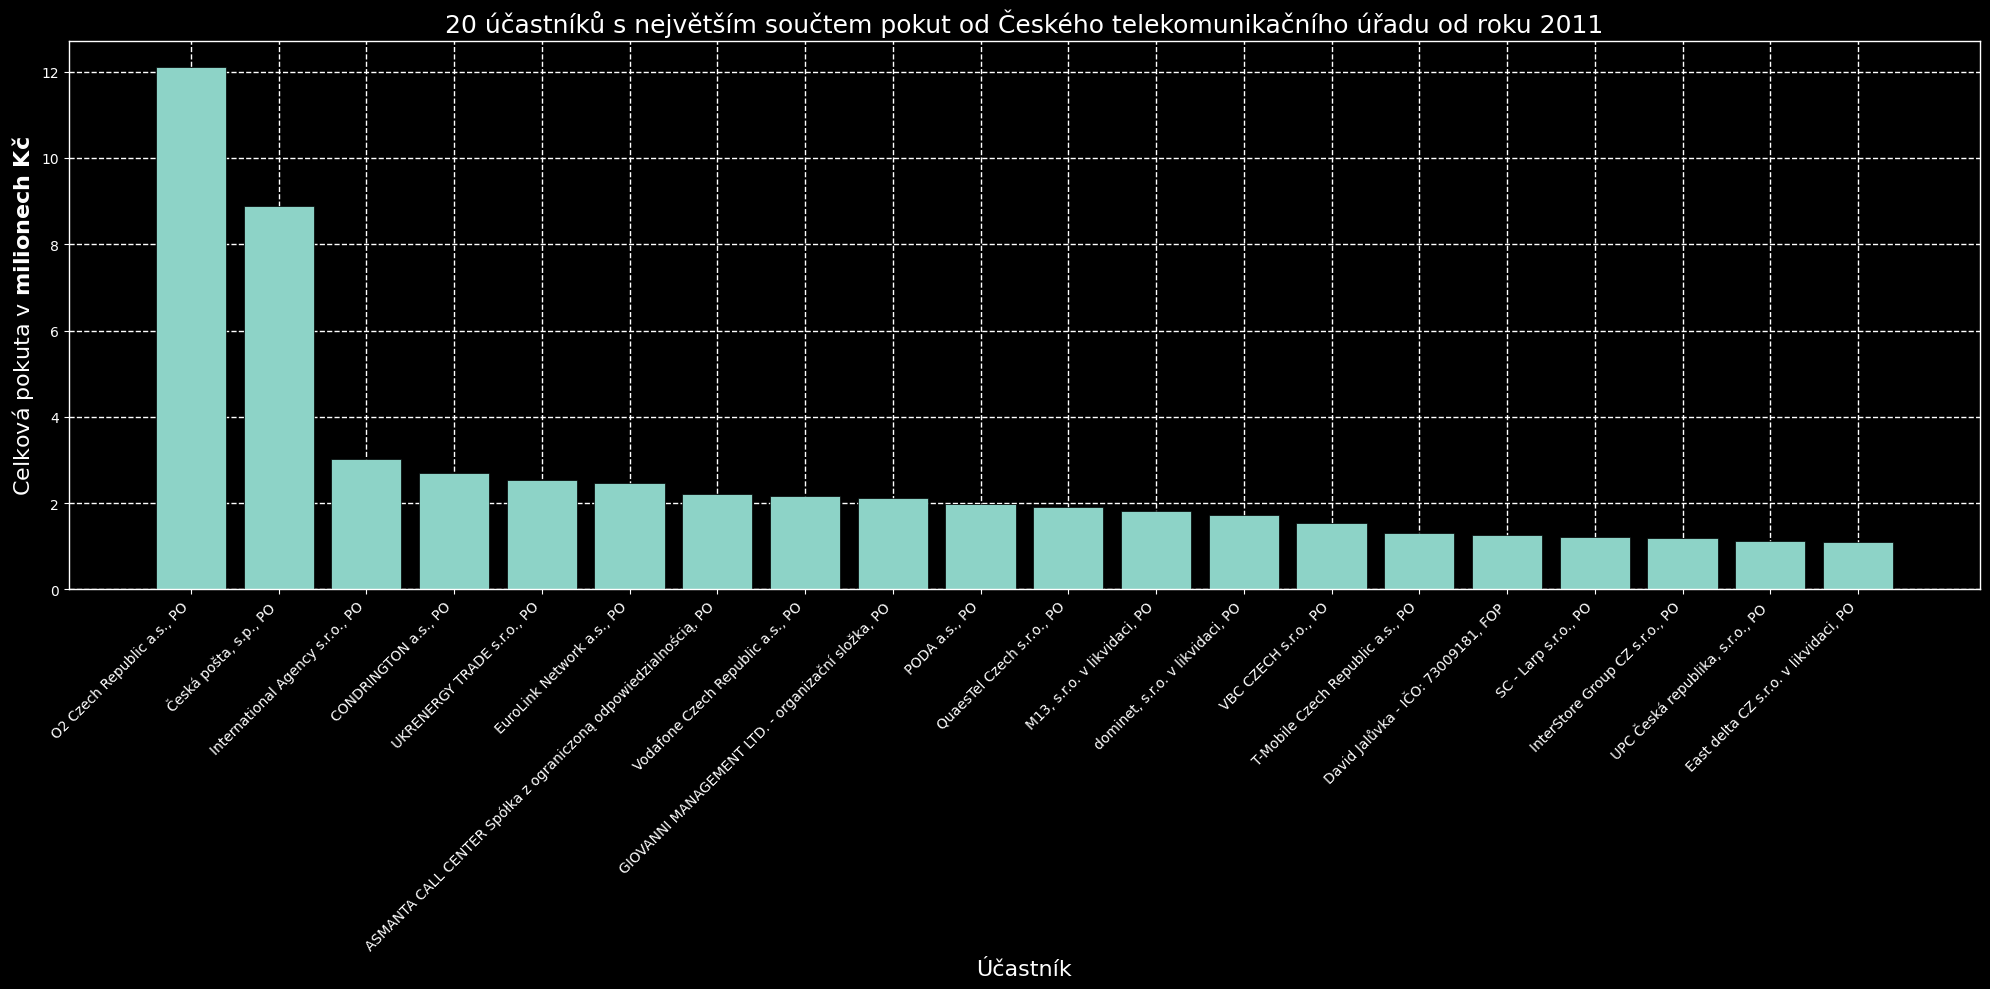

In [14]:
df_pokuty = pd.read_csv("Pokuty_moss.csv")

plt.style.use("dark_background")

# odebrat ucastniky pod jmenem fyzicka osoba nepodnikajici (spojilo by to dohromady jinak)
df_pokuty_filtrovany = df_pokuty.query('UCASTNIK != "Fyzická osoba nepodnikající"')

top_ucastnici = df_pokuty_filtrovany.groupby("UCASTNIK")["POKUTA_V_KC"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(20, 10)) 
plt.bar(top_ucastnici.index, top_ucastnici.values / 1e6, edgecolor="black")

plt.title("20 účastníků s největším součtem pokut od Českého telekomunikačního úřadu od roku 2011", fontsize=18)
plt.xlabel("Účastník", fontsize=16)
plt.ylabel("Celková pokuta v$\mathbf{\ milionech\ Kč}$", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle = "--")

plt.tight_layout()
plt.show()